# Object detection API

This notebook includes examples how to use object detection models trained based on the Tensorflow object detection API.

In [15]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import cv2

from detection_utils import load_model, run_inference_for_single_image, tf_dataset_generator
from visualization_utils import plot_bboxes_on_image

In [2]:
# Load model.
# You can find pre-trained models at ag-pp2/Nabil_7/data/models

model_path = Path("./example_data/ssd_lensfree_a549")
model = load_model(model_path)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [3]:
# Load data.
# You can find datasets at ag-pp2/7_Nabil/data/[train, val]

data_path = Path("./example_data/lensfree.tfrecord")
data_generator = tf_dataset_generator(data_path)

## Predict on image

In [13]:
# Prediction on first 5 images
predictions, images, gts = [], [], []

for i, query in enumerate(data_generator):
    
    print(f"Running prediction {i}/{5}", end="\r")
    
    if i == 5:
        break

    # Get annotation
    image = query.get("image")
    gt_bboxes = query.get("bboxes")
    
    # Predict on image
    pred = run_inference_for_single_image(model, image)
    pred_bboxes, pred_scores = pred.get("detection_boxes"), pred.get("detection_scores")
    
    # Only keep confident predictions
    keep = np.where(pred_scores >= 0.3)
    pred_bboxes, pred_scores = pred_bboxes[keep], pred_scores[keep]
    
    # Save predictions
    predictions.append({"prediction": pred_bboxes, "score": pred_scores})
    images.append(image)
    gts.append(gt_bboxes)

## Visualize predictions

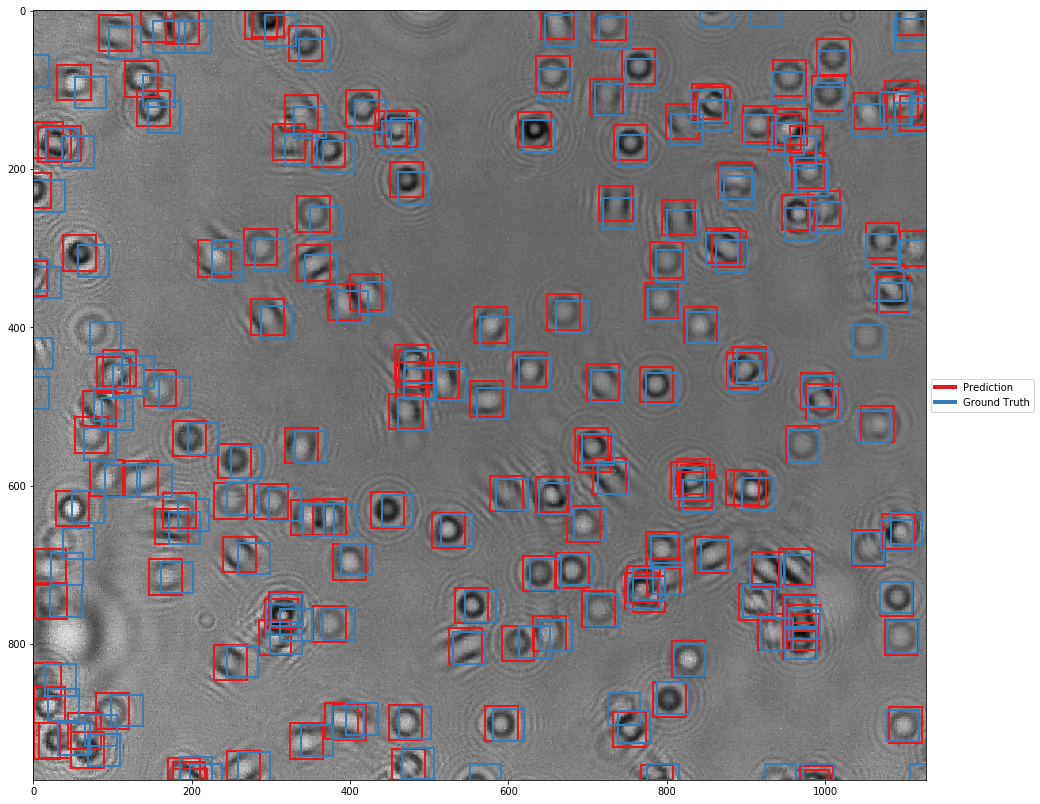

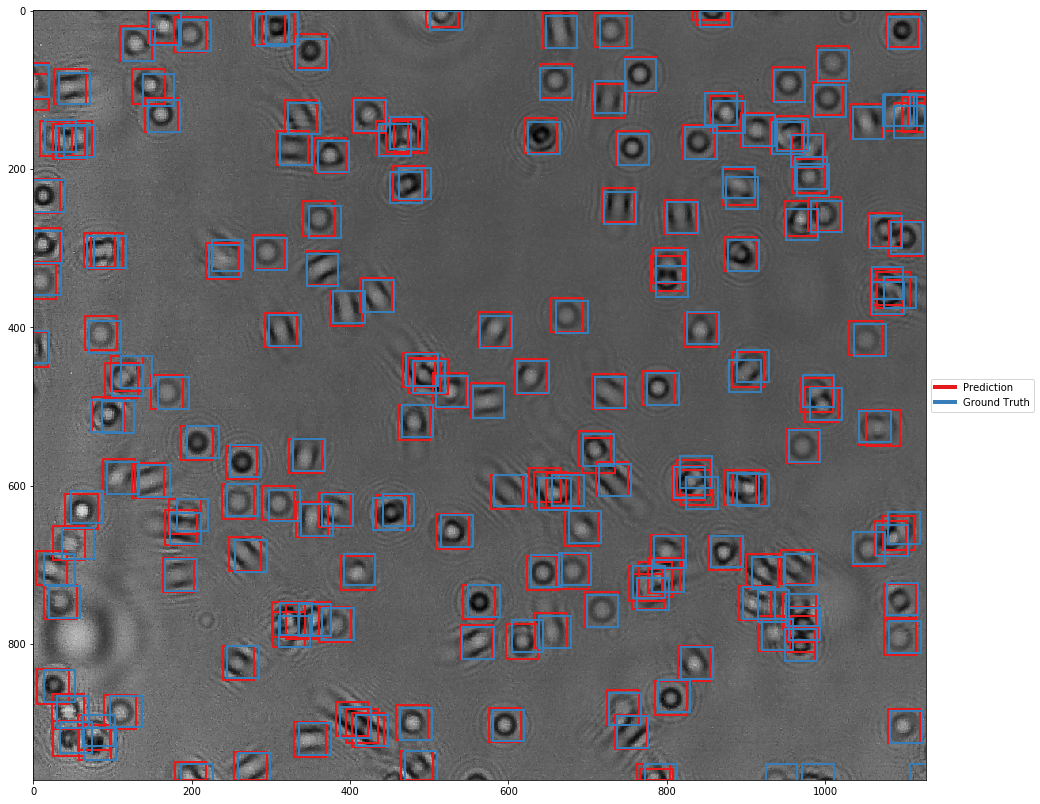

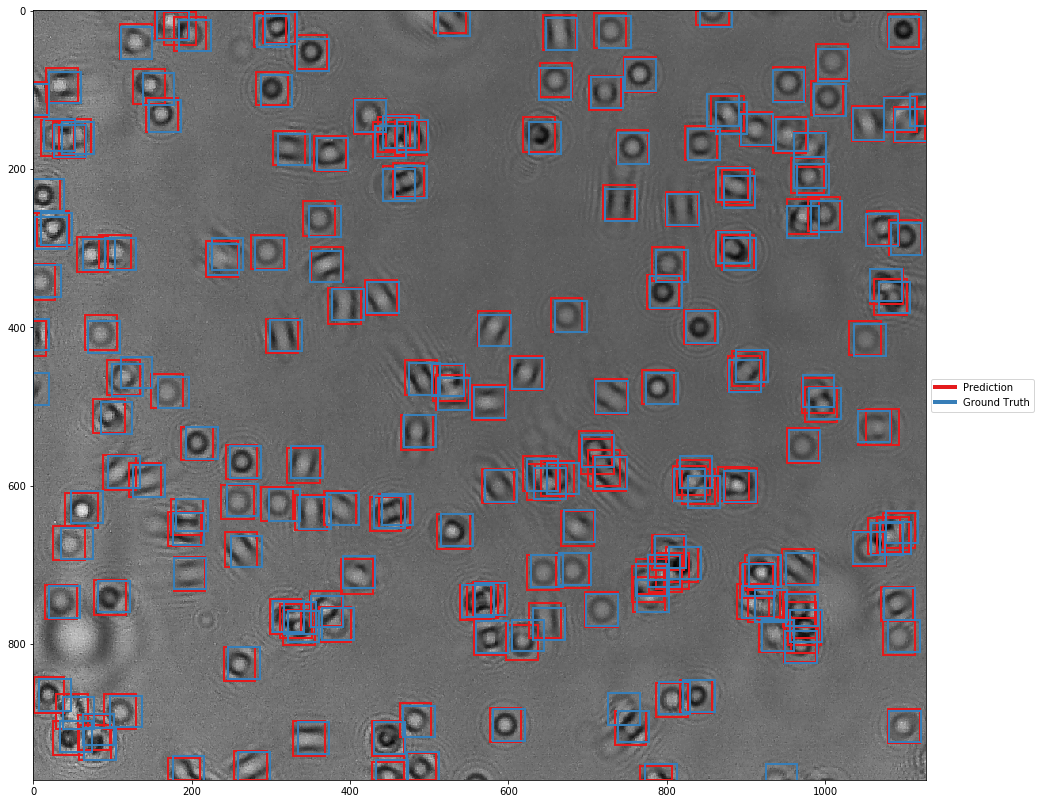

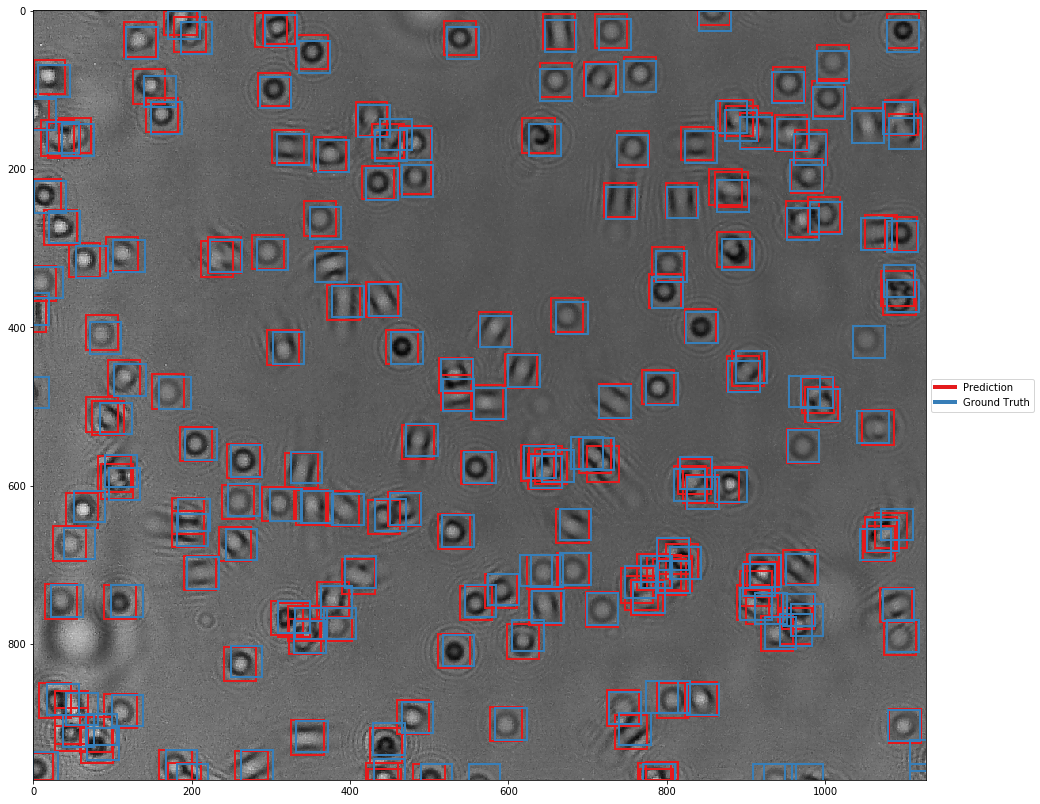

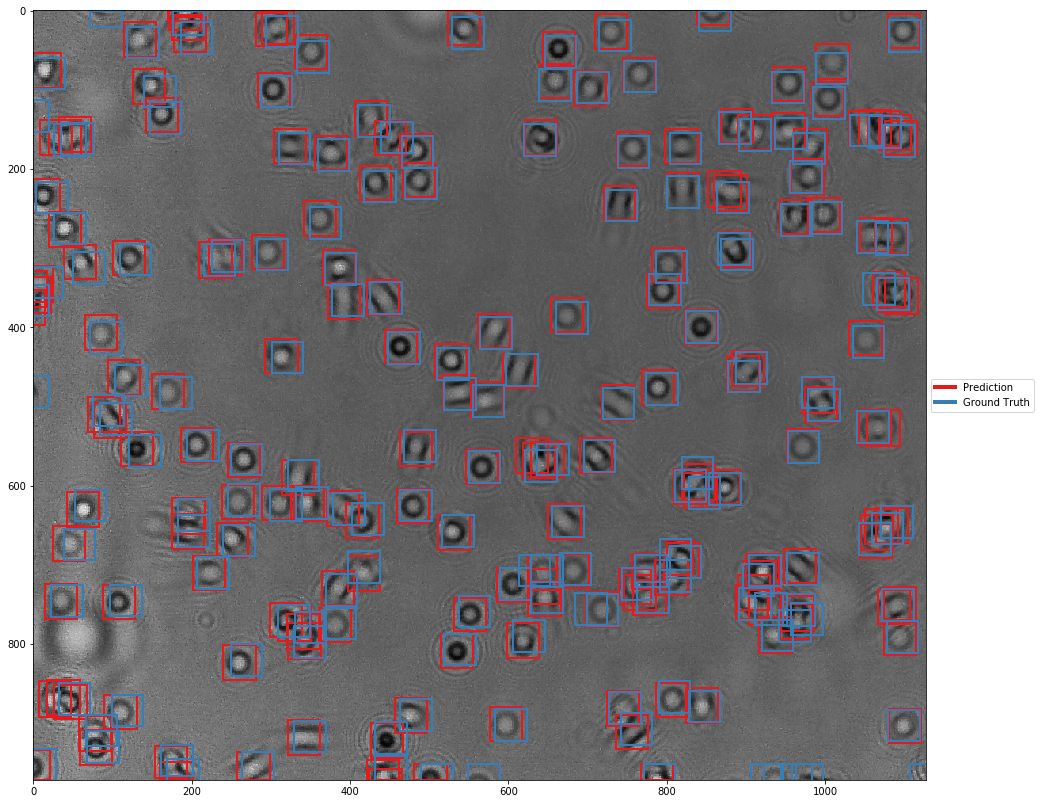

In [17]:
for pred, gt, img in zip(predictions, gts, images):
    plot_bboxes_on_image(img, pred.get("prediction"), gt, labels=["Prediction", "Ground Truth"])